<a href="https://colab.research.google.com/github/canerskrc/Borusan_Kod_Adi_Dijital/blob/main/Borusan_day9_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re

#Veri Hazırlama

In [5]:
df = pd.read_csv("Car_Tyres_Dataset.csv")
df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


In [6]:
df.columns = [re.sub(r'\W+','_',c.strip().lower()) for c in df.columns]

price_candidates = [c for c in df.columns if 'price' in c or ('selling' in c and 'price' in c)]
#if('price in c') or ('selling' in c)
df.head()

,brand,model,submodel,tyre_brand,serial_no_,type,load_index,size,selling_price,original_price,rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


In [7]:
df['_price'] = df[price_candidates[0]] if price_candidates else np.nan

In [8]:
def parse_size(s: pd.Series) -> pd.DataFrame:
  pat = re.complile(r'(?P<width>\d{3})\D+(?P<aspect>\d{2})\D+R?\D*(?P<rim>\d{2})', re.I)

  width, aspect, rim =[],[],[]
  for val in s.fillna(''):
    m = pat.search(str(val))
    width.append(int(m.group('width')) if m else np.nan )

In [9]:
def robust_z(x: pd.Series) -> pd.Series:
  med = np.nanmedian(x)
  mad = np.nanmedian(np.abs(x-med))
  payda = mad if mad > 0 else (np.nansdt(x) or 1.0)
  return 0.674 * (x-med) / payda

In [10]:
#Nadir Marka Gruplama(RARE ENCODING & ETIKET KORUMA)
min_shape= 0.02
brand_counts = df['brand'].value_counts(normalize=True)
rare_brands = set(brand_counts[brand_counts < min_shape].index)
df['_brand_compact']= np.where(df['brand'].isin(rare_brands), 'OTHER', df['brand'])

In [11]:
# İndirimli Fiyat Türevi

df['_discount_ratio'] = (df['original_price']- df['_price'] / df['original_price'])
mask_bad = (df['_discount_ratio'] < -0.05) | (df['_discount_ratio'] > 0.90)
df['_discount_anomaly'] = mask_bad.astype(int)
df.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [13]:
#Eksik veri kontrolü

missing_counts = df.isna().sum()
missing_ratio = df.isna().mean() * 100
print(missing_counts)
print(missing_ratio)

brand                0
model                0
submodel             0
tyre_brand           0
serial_no_           0
type                 0
load_index           0
size                 0
selling_price        0
original_price       0
rating            2102
_price               0
_brand_compact       0
dtype: int64
brand              0.000000
model              0.000000
submodel           0.000000
tyre_brand         0.000000
serial_no_         0.000000
type               0.000000
load_index         0.000000
size               0.000000
selling_price      0.000000
original_price     0.000000
rating            48.321839
_price             0.000000
_brand_compact     0.000000
dtype: float64


In [14]:
missing_report = pd.DataFrame({
    "Eksik_Sayı": missing_counts,
    "Eksik_Oran" : missing_ratio.round(2)
}).sort_values("Eksik_Oran", ascending=False)
print(missing_report)

                Eksik_Sayı  Eksik_Oran
rating                2102       48.32
model                    0        0.00
submodel                 0        0.00
tyre_brand               0        0.00
brand                    0        0.00
serial_no_               0        0.00
type                     0        0.00
size                     0        0.00
load_index               0        0.00
selling_price            0        0.00
original_price           0        0.00
_price                   0        0.00
_brand_compact           0        0.00


In [18]:
df['is_na_rating'] = df['rating'].isnull().astype(int)
df.head()

,brand,model,submodel,tyre_brand,serial_no_,type,load_index,size,selling_price,original_price,rating,_price,_brand_compact,is_na_price,is_na_rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0,"3,255",Maruti,0,0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0,"3,406",Maruti,0,0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5,"3,490",Maruti,0,0
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN,"4,484",Maruti,0,1
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2,"3,025",Maruti,0,0


In [21]:
rating_na_by_brand = df.groupby('tyre_brand')['is_na_rating'].mean().sort_values(ascending=False)
print(rating_na_by_brand.head(10))

tyre_brand
Hankook        1.000000
Kumho          1.000000
Maxxis         1.000000
Firestone      0.964912
Continental    0.828909
Falken         0.650558
JKTyre         0.604494
UltraMile      0.557047
GoodYear       0.550898
Yokohama       0.461741
Name: is_na_rating, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



/tmp/ipython-input-1746002596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


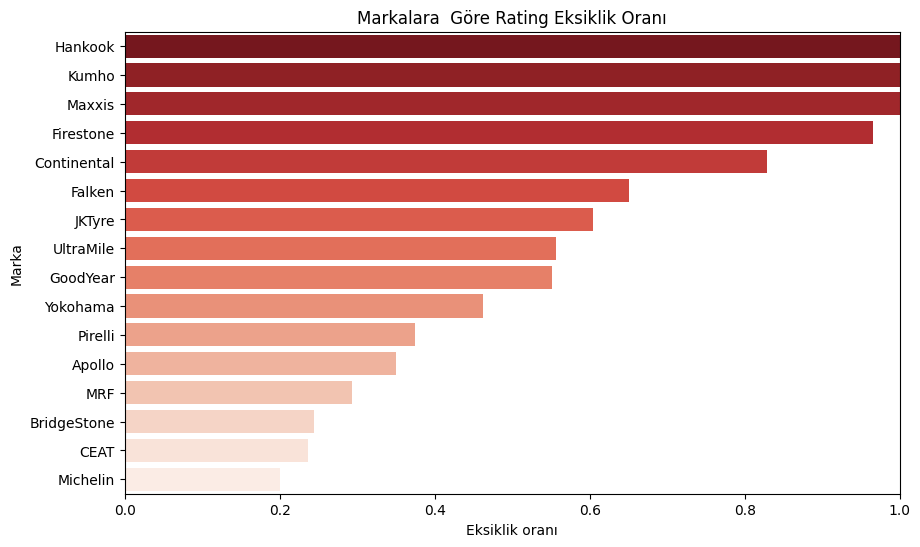

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    x= rating_na_by_brand.values,
    y= rating_na_by_brand.index,
    palette = "Reds_r"
)
plt.title("Markalara  Göre Rating Eksiklik Oranı")
plt.xlabel("Eksiklik oranı")
plt.ylabel("Marka")
plt.xlim(0,1)
plt.show()